<a href="https://colab.research.google.com/github/RV05/FASTER-RCNN-detectron2/blob/main/Custom_tower_final_Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Detectron2 Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Final_Tower

/content/drive/MyDrive/Final_Tower


In [ ]:

# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 25kB/s 
     |████████████████████████████████| 6.6MB 53.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.0+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
     |████████████████████████████████| 276kB 8.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=49c0aa0a3f2586f638110a7852d8e0a0d7f2cf616af367c556704c5b4b49345e
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.1

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 1.8MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210415-cp37-none-any.whl size=59310 sha256=88cce74cda2ed913ddc8952ae556dcd12d7b25b1db6eecb35f6108ab37693b6f
  Stored in directory: /root/.cache/pip/wheels/a3/51/39/6bce45bcb56ba30ed7ea1386ddc22bb5853fa9887c080145e8
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

# Import and Register Custom Detectron2 Data

In [ ]:
# !curl -L "https://app.roboflow.com/ds/gbVInXYbd6?key=bgSvLXgKrC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   888  100   888    0     0   1034      0 --:--:-- --:--:-- --:--:--  1033
100 6983k  100 6983k    0     0  5829k      0  0:00:01  0:00:01 --:--:-- 5829k
Archive:  roboflow.zip
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.roboflow.txt     
replace test/17_JPG.rf.93bfedf7ff3ba03976c4c59fa66b23b7.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: test/17_JPG.rf.93bfedf7ff3ba03976c4c59fa66b23b7.jpg  
 extracting: test/33_JPG.rf.152e79208c4edd13fe756548b704a13b.jpg  
 extracting: test/49_JPG.rf.cc01174cb770d66b08b44bddc5f6cfb1.jpg  
 extracting: test/70_JPG.rf.9e0f35f163a403bbfebf78534a3cb1c9.jpg  
 extracting: test/85_JPG.rf.8d6f5f52766544280e1d1f8460a98bab.jpg  
 extracting: test/91_JPG.rf.861580e26d658301ea21a6888ce0a276.jpg  
 extracting: test/DJI_0205_JPG.rf.170e4c77df84e4a04

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/drive/MyDrive/Final_Tower/train/_annotations.coco.json", "/content/drive/MyDrive/Final_Tower/train")
register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/Final_Tower/valid/_annotations.coco.json", "/content/drive/MyDrive/Final_Tower/valid")
register_coco_instances("my_dataset_test", {}, "/content/drive/MyDrive/Final_Tower/test/_annotations.coco.json", "/content/drive/MyDrive/Final_Tower/test")


WARNING [04/17 11:38:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/17 11:38:35 d2.data.datasets.coco]: Loaded 118 images in COCO format from /content/drive/MyDrive/Final_Tower/train/_annotations.coco.json


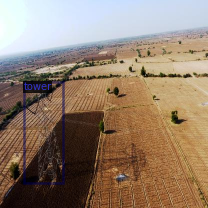

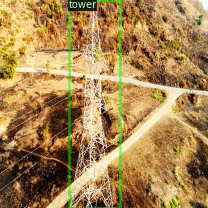

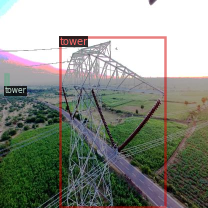

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Train Custom Detectron2 Detector

In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/17 11:38:41 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:10, 40.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.


[04/17 11:38:53 d2.engine.train_loop]: Starting training from iteration 0
[04/17 11:39:31 d2.utils.events]:  eta: 0:43:40  iter: 19  total_loss: 1.639  loss_cls: 1.020  loss_box_reg: 0.323  loss_rpn_cls: 0.242  loss_rpn_loc: 0.034  time: 1.8896  data_time: 0.1853  lr: 0.000020  max_mem: 7235M
[04/17 11:40:10 d2.utils.events]:  eta: 0:45:37  iter: 39  total_loss: 1.363  loss_cls: 0.723  loss_box_reg: 0.527  loss_rpn_cls: 0.108  loss_rpn_loc: 0.023  time: 1.9067  data_time: 0.0087  lr: 0.000040  max_mem: 7235M
[04/17 11:40:52 d2.utils.events]:  eta: 0:46:29  iter: 59  total_loss: 1.248  loss_cls: 0.514  loss_box_reg: 0.600  loss_rpn_cls: 0.116  loss_rpn_loc: 0.022  time: 1.9758  data_time: 0.0089  lr: 0.000060  max_mem: 7235M
[04/17 11:41:36 d2.utils.events]:  eta: 0:48:32  iter: 79  total_loss: 1.212  loss_cls: 0.433  loss_box_reg: 0.656  loss_rpn_cls: 0.050  loss_rpn_loc: 0.019  time: 2.0291  data_time: 0.0084  lr: 0.000080  max_mem: 7235M
[04/17 11:42:19 d2.utils.events]:  eta: 0:48:1

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

<IPython.core.display.Javascript object>

In [ ]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [04/17 12:32:58 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/17 12:32:58 d2.data.datasets.coco]: Loaded 13 images in COCO format from /content/drive/MyDrive/Final_Tower/test/_annotations.coco.json
[04/17 12:32:58 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|   tower    | 0            |   tower    | 15           |
|            |              |            |              |
|   total    | 15           |            |              |
[04/17 12:32:58 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[04/17 12:32:58 d2.data.common]: Serialized dataset takes 0.00 MiB
[04/17 12:32:58 d2.evaluation.evaluator]: Start inference on 13 images
[04/17 12:33:00 d2.evaluation.evaluator]: Inference done 11/13. 0.1945 s / img. ETA=0:00:00
[04/17 12:33:01 

OrderedDict([('bbox',
              {'AP': 58.56600660066009,
               'AP-tower': 58.56600660066009,
               'AP50': 78.74587458745876,
               'AP75': 72.8712871287129,
               'APl': 68.31240047081633,
               'APm': nan,
               'APs': 5.0495049504950495})])

# Inference with Detectron2 Saved Weights



In [ ]:
%ls ./output/

coco_instances_results.json
events.out.tfevents.1618040575.84edf3437d5e.59.0
events.out.tfevents.1618197774.3dd379d15cf6.57.0
events.out.tfevents.1618282978.7176f0a666c3.58.0
events.out.tfevents.1618598358.530138e61087.61.0
events.out.tfevents.1618598708.661000fb6f28.58.0
events.out.tfevents.1618601633.fbf3540490b1.59.0
events.out.tfevents.1618633880.0da6e850e799.58.0
events.out.tfevents.1618635960.be192dd599da.59.0
events.out.tfevents.1618642603.7e5a822ad829.59.0
events.out.tfevents.1618659522.853120af0bf3.60.0
instances_predictions.pth
last_checkpoint
metrics.json
model_final.pth


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.89   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

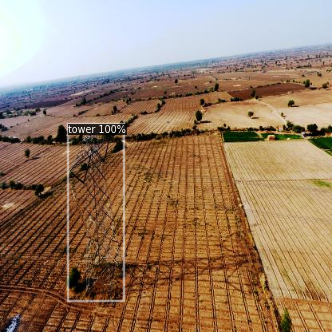

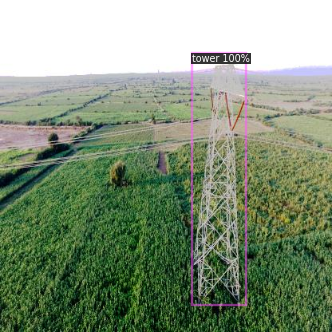

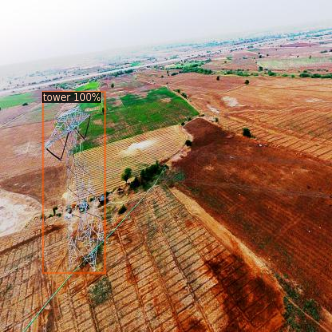

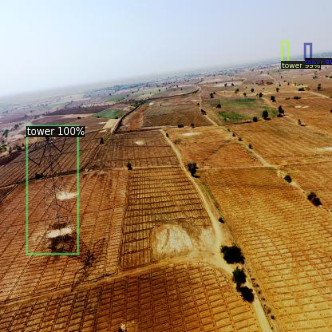

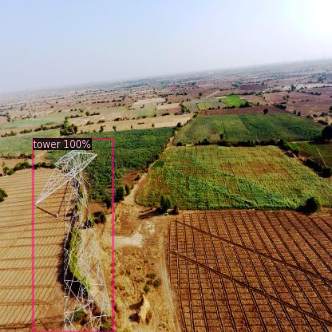

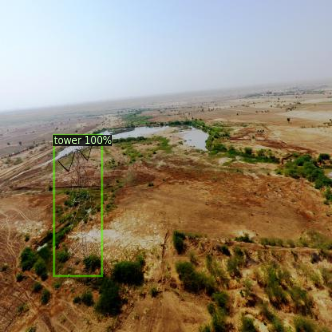

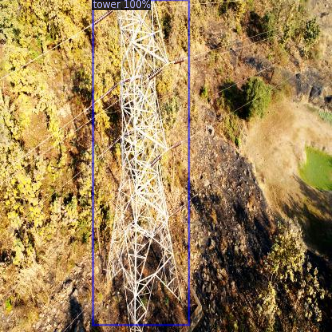

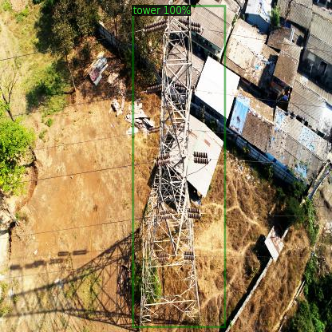

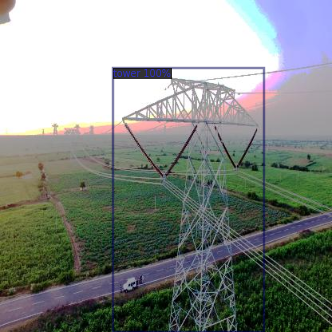

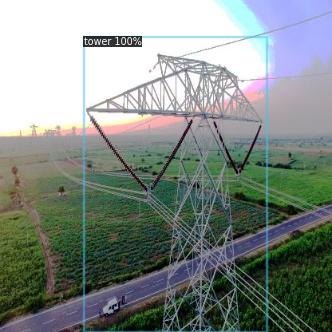

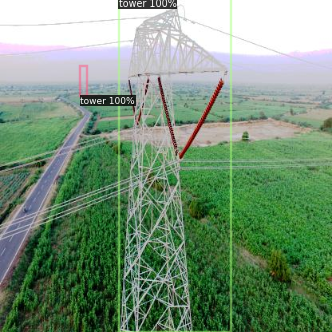

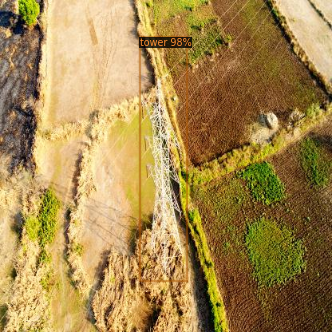

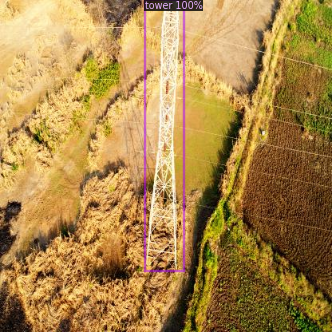

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/drive/MyDrive/Final_Tower/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])


In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/drive/MyDrive/video/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  #cv2_imshow(out.get_image()[:, :, ::-1])
  cv2.imwrite(f'{imageName}',out.get_image()[:, :, ::-1])
